## -----------------------------------------Zomato Restaurant Ratings-------------------------------------------

##### >>Abstract of Project

Zomato is one of the best online food delivery apps which gives the users the ratings and the reviews on restaurants all over india.These ratings and the Reviews are considered as one of the most important deciding factors which determine how good a restaurant is.

Content The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world.

With each day new restaurants opening the industry has’nt been saturated yet and the demand is increasing day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves.

##### >>Source of dataset 

Source: Kaggle , Github

Tools used :

1.python 3.6

2.Numpy

3.Pandas

4.Matplotlib

5.Seaborn

6.Sklearn

7.Machine learning

##### >>Objective of Project is ::

1. Perform an extensive Exploratory Data Analysis(EDA) on the Zomato Dataset.

2. Build an appropriate Machine Learning Model that will help various Zomato Restaurants to predict their respective Ratings based on certain features.

3. DEPLOY the Machine learning model via Flask that can be used to make live predictions of restaurants ratings.

##### >>The flow of the case study is as below:

###### Defining the problem statement:

Target column in dataset is ::  **rate**

##### >>Features/Columns description :

1.**URL** : particular shop/restaurant link

2.**Address** : address of the restaurant

3.**Name** : restaurant name 

4.**Online_order** : whether online ordering is available in the restaurant or not  (YES or NO)

5.**Book_table** : table book option is available or not (YES or NO)

6.**Rate** : overall rating out of 5

7.**Votes** : The number of people who voted for the rating

8.**Phone** : phone number of the restaurant

9.**Location** : location of the restaurant

10.**rest type** : Type of restaurant

11.**dish liked** : dishes people liked in the restaurant

12.**Cuisines** : Various type of food offered in restaurant

13.**approx cost(for two people)** : approximate cost for meal for two people

14.**reviews list** :  Rating and review is present in dataset

15.**menu item** :  list of menu items served to people in the restaurant

16.**listed in(type)** : type of meal

17.**listed in(city)** : city where the restaurant is present

---------------------------------------------------------------------------------------------------------------------------

In [1]:
# import python library

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report , confusion_matrix,mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor,AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset

In [3]:
rest_data = pd.read_csv("zomato.csv")
rest_data.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


## Data pre-processing

In [4]:
# dataset shape check

In [5]:
rest_data.shape

(51717, 17)

In [6]:
# Before delete duplicates in dataset 

print('Shape before deleting duplicate values:', rest_data.shape)

Shape before deleting duplicate values: (51717, 17)


In [7]:
# Removing duplicate rows if any in dataset
rest_data=rest_data.drop_duplicates()
print('Shape After deleting duplicate values:', rest_data.shape)

Shape After deleting duplicate values: (51717, 17)


##### >>1.EDA (Exploratory Data Analysis)

In [8]:
rest_data.shape

(51717, 17)

In [9]:
rest_data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [10]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [11]:
rest_data = rest_data.drop(["url","address","phone","dish_liked","reviews_list","menu_item"], axis= True)
rest_data.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari


^ Above .info we can see that there are in features null values are present like >>
rate- 43942 , location - 51696 ,rest_type - 51490 , cuisines - 51672 , approx_cost(for two people) - 51371

so we have to handle missing values

In [12]:
# After drop features in dataset 
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.7+ MB


##### >>Dropping Duplicates in Dataset 

In [13]:
rest_data.drop_duplicates(inplace= True)
rest_data.shape

(51609, 11)

In [14]:
rest_data.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari


##### >>Clean the rate column

In [15]:
rest_data["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
# rest_data.rate[(rest_data == "NEW") & (rest_data == "-")]

In [17]:
# Removing the values in column >> "NEW" , "-" , "/5" from rate column
def rate_col (value):
    if (value == "NEW" or value == "-"):
        return np.nan
    else:
        value = str (value).split("/")
        value = value [0]
        return float (value)
rest_data["rate"] = rest_data ["rate"].apply (rate_col)
rest_data["rate"].head(6)

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
5    3.8
Name: rate, dtype: float64

In [18]:
# Alternate way of spliting 

# rest_data["rate"] =  rest_data["rate"].str.split("/").str.get(0)
#  rest_data["rate"]

In [19]:
# Check null values in rate column
rest_data.rate.isna().sum()

10019

In [20]:
# now we will do the fill null values in rate column with mean
rest_data["rate"].fillna(rest_data["rate"].mean() , inplace= True)
rest_data["rate"].isnull().sum()

0

In [21]:
# After Fill na value using mean Checking The Output of rate column
rest_data.rate.isna().sum()

0

In [22]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [23]:
# Renaming the column>> approx_cost(for two people) ::: cost2people , listed_in(type) ::: type , listed_in(city) ::: city

rest_data.rename (columns= {"approx_cost(for two people)" : "cost2people" , "listed_in(type)" : "type" , "listed_in(city)" : "city"}, inplace = True)
rest_data.head(5)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2people,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [24]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51609 non-null  object 
 1   online_order  51609 non-null  object 
 2   book_table    51609 non-null  object 
 3   rate          51609 non-null  float64
 4   votes         51609 non-null  int64  
 5   location      51588 non-null  object 
 6   rest_type     51382 non-null  object 
 7   cuisines      51564 non-null  object 
 8   cost2people   51265 non-null  object 
 9   type          51609 non-null  object 
 10  city          51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [25]:
rest_data["location"].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [26]:
rest_data["rest_type"].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [27]:
rest_data["cuisines"].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [28]:
rest_data["cost2people"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [29]:
# so both "location" and "city" columns are there so we need to drop one of them because both columns are same.

rest_data = rest_data.drop(["location"],axis = 1)
rest_data.tail(5)

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost2people,type,city
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,3.700142,0,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700142,0,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,Bar,Finger Food,"2,500",Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.400000,13,"Bar, Casual Dining","Finger Food, North Indian, Continental","1,500",Pubs and bars,Whitefield


### cost2people

In [30]:
rest_data["cost2people"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [31]:
# removed from "cost2people" (,) and nan

In [32]:
rest_data["cost2people"].isna().sum()

344

In [33]:
# rest_data["cost2people"] = rest_data["cost2people"].apply(lambda x: x.replace(',','')if type (x) == np.str else x)
# rest_data["cost2people"]
# rest_data.cost2people = rest_data.cost2people.apply(df).str.strip().astype('float')

In [34]:
def comma_remove (value):
    value = str(value)
    if "," in value:
        value = value.replace(",","")
        return float (value)
    else :
        return float (value)

rest_data["cost2people"] = rest_data["cost2people"].apply (comma_remove)
rest_data["cost2people"].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [35]:
rest_data.head(5)

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost2people,type,city
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


In [36]:
rest_data["cost2people"].fillna(rest_data["cost2people"].mode()[0],inplace=True)
rest_data["cost2people"]=rest_data["cost2people"].astype(int)

In [37]:
rest_data["cost2people"].isna().sum()

0

In [38]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51609 non-null  object 
 1   online_order  51609 non-null  object 
 2   book_table    51609 non-null  object 
 3   rate          51609 non-null  float64
 4   votes         51609 non-null  int64  
 5   rest_type     51382 non-null  object 
 6   cuisines      51564 non-null  object 
 7   cost2people   51609 non-null  int32  
 8   type          51609 non-null  object 
 9   city          51609 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 4.1+ MB


### cuisines

In [39]:
rest_data["cuisines"].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [40]:
rest_data["cuisines"].value_counts()

North Indian                                  2907
North Indian, Chinese                         2381
South Indian                                  1826
Biryani                                        915
Bakery, Desserts                               910
                                              ... 
European, Asian, North Indian                    1
North Indian, Continental, Mughlai, Andhra       1
Fast Food, Ice Cream, Pizza, Desserts            1
Continental, Fast Food, Chinese, Burger          1
North Indian, Chinese, Arabian, Momos            1
Name: cuisines, Length: 2723, dtype: int64

In [41]:
rest_data["cuisines"].isna().sum()

45

In [42]:
cuisines_data = rest_data["cuisines"].value_counts(ascending= False)
cuisines_data

North Indian                                  2907
North Indian, Chinese                         2381
South Indian                                  1826
Biryani                                        915
Bakery, Desserts                               910
                                              ... 
European, Asian, North Indian                    1
North Indian, Continental, Mughlai, Andhra       1
Fast Food, Ice Cream, Pizza, Desserts            1
Continental, Fast Food, Chinese, Burger          1
North Indian, Chinese, Arabian, Momos            1
Name: cuisines, Length: 2723, dtype: int64

In [43]:
cuisines_lessthan100 = cuisines_data[cuisines_data<100]
cuisines_lessthan100

North Indian, Continental, Chinese            97
Juices                                        94
Bengali, North Indian                         93
Fast Food, North Indian                       93
Tibetan, Momos                                90
                                              ..
European, Asian, North Indian                  1
North Indian, Continental, Mughlai, Andhra     1
Fast Food, Ice Cream, Pizza, Desserts          1
Continental, Fast Food, Chinese, Burger        1
North Indian, Chinese, Arabian, Momos          1
Name: cuisines, Length: 2654, dtype: int64

In [44]:
def handle_cuisines (value):
    if (value in cuisines_lessthan100):
        return "others"
    else :
        return value
rest_data["cuisines"] = rest_data["cuisines"].apply(handle_cuisines) 

In [45]:
# rest_data["cuisines"] = rest_data["cuisines"].apply(lambda x:"Others" if x in less_than_100 else x)

In [46]:
rest_data["cuisines"].value_counts()

others                                 26397
North Indian                            2907
North Indian, Chinese                   2381
South Indian                            1826
Biryani                                  915
                                       ...  
South Indian, Chinese, North Indian      105
Italian, Pizza                           105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

In [47]:
rest_data.head(6)

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost2people,type,city
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,others,800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining",others,800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,others,600,Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8,286,Casual Dining,North Indian,600,Buffet,Banashankari


In [48]:
rest_data["cuisines"].isna().sum()

45

In [49]:
rest_data["cuisines"].mode()[0]

'others'

In [50]:
rest_data["cuisines"] = rest_data["cuisines"].fillna(method="bfill")
rest_data["cuisines"]

0        North Indian, Mughlai, Chinese
1                                others
2                                others
3            South Indian, North Indian
4                                others
                      ...              
51712                       Continental
51713                       Finger Food
51714                       Finger Food
51715                       Finger Food
51716                            others
Name: cuisines, Length: 51609, dtype: object

In [51]:
rest_data["cuisines"].isna().sum()

0

### rest_type

In [52]:
rest_data["rest_type"].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [53]:
rest_data["rest_type"].isna().sum()

227

In [54]:
rest_data["rest_type"].value_counts()

Quick Bites                   19096
Casual Dining                 10309
Cafe                           3727
Delivery                       2600
Dessert Parlor                 2260
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [55]:
df = rest_data["rest_type"].value_counts(ascending= False)
df

Quick Bites                   19096
Casual Dining                 10309
Cafe                           3727
Delivery                       2600
Dessert Parlor                 2260
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [56]:
rest_data_lessthan1000 = df[df < 1000]
rest_data_lessthan1000

Beverage Shop                 865
Bar                           697
Food Court                    621
Sweet Shop                    468
Bar, Casual Dining            420
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Sweet Shop, Dessert Parlor      1
Quick Bites, Kiosk              1
Name: rest_type, Length: 85, dtype: int64

In [57]:
def handle_rest_type(value):
    if (value in rest_data_lessthan1000):
        return "other"
    else:
        return value
rest_data["rest_type"] = rest_data["rest_type"].apply(handle_rest_type)
rest_data["rest_type"].value_counts()

Quick Bites           19096
Casual Dining         10309
other                  9071
Cafe                   3727
Delivery               2600
Dessert Parlor         2260
Takeaway, Delivery     2031
Casual Dining, Bar     1148
Bakery                 1140
Name: rest_type, dtype: int64

In [58]:
rest_data["rest_type"].isna().sum()

227

In [59]:
rest_data["rest_type"].mode()[0]

'Quick Bites'

In [60]:
rest_data["rest_type"] = rest_data["rest_type"].fillna(method="ffill")
rest_data["rest_type"]

0        Casual Dining
1        Casual Dining
2                other
3          Quick Bites
4        Casual Dining
             ...      
51712            other
51713            other
51714            other
51715            other
51716            other
Name: rest_type, Length: 51609, dtype: object

In [61]:
rest_data["rest_type"].isna().sum()

0

In [62]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51609 non-null  object 
 1   online_order  51609 non-null  object 
 2   book_table    51609 non-null  object 
 3   rate          51609 non-null  float64
 4   votes         51609 non-null  int64  
 5   rest_type     51609 non-null  object 
 6   cuisines      51609 non-null  object 
 7   cost2people   51609 non-null  int32  
 8   type          51609 non-null  object 
 9   city          51609 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 4.1+ MB


### replace "online_order" and "book_table" to binary form

In [63]:
rest_data['online_order'] = rest_data['online_order'].map(dict(Yes=1, No=0))
rest_data['online_order']

0        1
1        1
2        1
3        0
4        0
        ..
51712    0
51713    0
51714    0
51715    0
51716    0
Name: online_order, Length: 51609, dtype: int64

In [64]:
rest_data['book_table'] = rest_data['book_table'].map(dict(Yes=1, No=0))
rest_data['book_table']

0        1
1        0
2        0
3        0
4        0
        ..
51712    0
51713    0
51714    0
51715    1
51716    0
Name: book_table, Length: 51609, dtype: int64

In [65]:
rest_data.head(6)

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost2people,type,city
0,Jalsa,1,1,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Casual Dining,others,800,Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,other,others,800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,0,0,3.8,166,Casual Dining,others,600,Buffet,Banashankari
5,Timepass Dinner,1,0,3.8,286,Casual Dining,North Indian,600,Buffet,Banashankari


In [66]:
rest_data["book_table"].unique()

array([1, 0], dtype=int64)

In [67]:
rest_data["online_order"].unique()

array([1, 0], dtype=int64)

In [68]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51609 non-null  object 
 1   online_order  51609 non-null  int64  
 2   book_table    51609 non-null  int64  
 3   rate          51609 non-null  float64
 4   votes         51609 non-null  int64  
 5   rest_type     51609 non-null  object 
 6   cuisines      51609 non-null  object 
 7   cost2people   51609 non-null  int32  
 8   type          51609 non-null  object 
 9   city          51609 non-null  object 
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 4.1+ MB


### label encoding (Data Transformation)

In [69]:
rest_data.rest_type = le.fit_transform(rest_data.rest_type)
rest_data.cuisines = le.fit_transform(rest_data.cuisines)
rest_data.type = le.fit_transform(rest_data.type)
rest_data.city = le.fit_transform(rest_data.city)

In [70]:
rest_data.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost2people,type,city
0,Jalsa,1,1,4.1,775,2,54,800,0,1
1,Spice Elephant,1,0,4.1,787,2,69,800,0,1
2,San Churro Cafe,1,0,3.8,918,8,69,800,0,1
3,Addhuri Udupi Bhojana,0,0,3.7,88,6,65,300,0,1
4,Grand Village,0,0,3.8,166,2,69,600,0,1


In [71]:
# drop coloumn "name" in dataset

rest_data = rest_data.drop(["name"], axis= True)
rest_data.head()

,online_order,book_table,rate,votes,rest_type,cuisines,cost2people,type,city
0,1,1,4.1,775,2,54,800,0,1
1,1,0,4.1,787,2,69,800,0,1
2,1,0,3.8,918,8,69,800,0,1
3,0,0,3.7,88,6,65,300,0,1
4,0,0,3.8,166,2,69,600,0,1


### handle outliers in "votes" column

<AxesSubplot:xlabel='votes'>

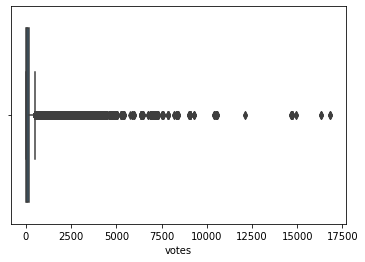

In [72]:
#  outlies check in column "votes"

sns.boxplot(rest_data['votes'])

In [73]:
# IQR Method for column "votes"

q1 = rest_data["votes"].quantile(0.25)
q2 = rest_data["votes"].quantile(0.50)
q3 = rest_data["votes"].quantile(0.75)

IQR = q3-q1
print ("IQR  :: ",IQR)

uppertail =q3 + (1.5*IQR)
lowertail =q1 - (1.5*IQR)

print ("uppertail value >>" ,uppertail)
print ("lowertail value >>" ,lowertail)

IQR  ::  191.0
uppertail value >> 484.5
lowertail value >> -279.5


In [74]:
rest_data.loc[(rest_data["votes"]>uppertail)]    # outliers present in uppertail

,online_order,book_table,rate,votes,rest_type,cuisines,cost2people,type,city
0,1,1,4.1,775,2,54,800,0,1
1,1,0,4.1,787,2,69,800,0,1
2,1,0,3.8,918,8,69,800,0,1
7,1,1,4.6,2556,8,69,600,1,1
9,1,0,4.2,504,1,69,550,1,1
...,...,...,...,...,...,...,...,...,...
51699,1,1,4.1,1218,8,69,1200,6,29
51700,0,1,4.1,1003,8,69,1500,6,29
51701,1,1,4.1,673,8,69,1400,6,29
51702,0,0,4.0,1094,8,69,1450,6,29


In [75]:
rest_data.loc[(rest_data["votes"]<lowertail)]   # outliers not present in lowertail

,online_order,book_table,rate,votes,rest_type,cuisines,cost2people,type,city


In [76]:
# finding data without ouliers
rest_data.loc[(rest_data["votes"]<=uppertail) & (rest_data["votes"]>=lowertail)]

,online_order,book_table,rate,votes,rest_type,cuisines,cost2people,type,city
3,0,0,3.700000,88,6,65,300,0,1
4,0,0,3.800000,166,2,69,600,0,1
5,1,0,3.800000,286,2,43,600,0,1
6,0,0,3.600000,8,2,69,800,0,1
8,1,0,4.000000,324,1,69,700,1,1
...,...,...,...,...,...,...,...,...,...
51712,0,0,3.600000,27,8,26,1500,6,29
51713,0,0,3.700142,0,8,35,600,6,29
51714,0,0,3.700142,0,8,35,2000,6,29
51715,0,1,4.300000,236,8,35,2500,6,29


In [77]:
mean_data = rest_data.loc[(rest_data["votes"]<=uppertail) & (rest_data["votes"]>=lowertail),"votes"].mean()
mean_data = int(np.ceil(mean_data))
mean_data

77

In [78]:
# outliers handling
rest_data.loc[(rest_data["votes"]>uppertail),"votes"] = mean_data

In [79]:
rest_data.loc[(rest_data["votes"]>uppertail)]

,online_order,book_table,rate,votes,rest_type,cuisines,cost2people,type,city


<AxesSubplot:xlabel='votes'>

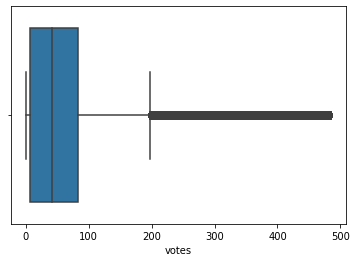

In [80]:
sns.boxplot(rest_data['votes'])

In [81]:
rest_data.describe()

,online_order,book_table,rate,votes,rest_type,cuisines,cost2people,type,city
count,51609.000000,51609.000000,51609.000000,51609.000000,51609.000000,51609.000000,51609.000000,51609.000000,51609.000000
mean,0.588289,0.124319,3.700142,76.289814,4.880292,52.684280,553.469841,2.807689,14.208665
std,0.492148,0.329949,0.395393,100.497008,2.402019,21.432799,437.616340,1.140684,8.285783
min,0.000000,0.000000,1.800000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
25%,0.000000,0.000000,3.500000,7.000000,2.000000,43.000000,300.000000,2.000000,7.000000
50%,1.000000,0.000000,3.700142,41.000000,6.000000,69.000000,400.000000,2.000000,15.000000
75%,1.000000,0.000000,3.900000,83.000000,6.000000,69.000000,650.000000,4.000000,20.000000
max,1.000000,1.000000,4.900000,484.000000,8.000000,69.000000,6000.000000,6.000000,29.000000


### Feature Scaling

In [82]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [83]:
# drop and define y variable 

x = rest_data.drop(columns="rate",axis = 1)
y = rest_data["rate"]

In [84]:
std_scalar = StandardScaler()
array = std_scalar.fit_transform(x)
scaled_x = pd.DataFrame(array,columns=x.columns)
scaled_x

,online_order,book_table,votes,rest_type,cuisines,cost2people,type,city
0,0.836568,2.654015,0.007067,-1.199125,0.061389,0.563353,-2.461431,-1.594151
1,0.836568,-0.376788,0.007067,-1.199125,0.761257,0.563353,-2.461431,-1.594151
2,0.836568,-0.376788,0.007067,1.298798,0.761257,0.563353,-2.461431,-1.594151
3,-1.195361,-0.376788,0.116524,0.466157,0.574626,-0.579211,-2.461431,-1.594151
4,-1.195361,-0.376788,0.892674,-1.199125,0.761257,0.106327,-2.461431,-1.594151
...,...,...,...,...,...,...,...,...
51604,-1.195361,-0.376788,-0.490465,1.298798,-1.245033,2.162943,2.798620,1.785164
51605,-1.195361,-0.376788,-0.759133,1.298798,-0.825112,0.106327,2.798620,1.785164
51606,-1.195361,-0.376788,-0.759133,1.298798,-0.825112,3.305508,2.798620,1.785164
51607,-1.195361,2.654015,1.589219,1.298798,-0.825112,4.448072,2.798620,1.785164


### Model Build

In [85]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.2, random_state = 45)

### Linear Regression Algorithm

### Model Train

In [86]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [87]:
# Training model of linear regression

y_pred_train = lr.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print("MSE = ",mse)
r2 = r2_score(y_train,y_pred_train)
print("r2 score = ",r2)

MSE =  0.12136257842819795
r2 score =  0.22416773814581936


In [88]:
# Testing model of linear regression

y_pred_test = lr.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
print("MSE = ",mse)
r2 = r2_score(y_test,y_pred_test)
print("r2 score = ",r2)

MSE =  0.12068640885064218
r2 score =  0.22609886619803332


In [89]:
lr_reg_pred=lr.predict(x_test)

In [90]:
from sklearn.metrics import r2_score
lr_reg_score=r2_score(y_test,lr_reg_pred)*100
print("Accuracy score for LR :",lr_reg_score)

Accuracy score for LR : 22.609886619803333


### Random Forest Regressor Algorithm

In [91]:
rfr=RandomForestRegressor()
rfr

RandomForestRegressor()

In [92]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [93]:
# Training model of RandomForestRegressor
print(rfr.score(x_train,y_train))

0.9683688854840055


In [94]:
# Testing model of RandomForestRegressor
print(rfr.score(x_test,y_test))

0.8155332438016946


In [95]:
rfr_pred=rfr.predict(x_test)

In [96]:
from sklearn.metrics import r2_score

rfr_score=r2_score(y_test,rfr_pred)*100
print("Accuracy score for RFR :",rfr_score)

Accuracy score for RFR : 81.55332438016946


### Hyperparameter Tuning for RandomForestRegressor

In [97]:
# from sklearn.model_selection import RandomizedSearchCV

In [98]:
# rfr_hyper = RandomForestRegressor()
# # par_grid = {"n_estimators":np.arange(10,15),
#              "criterion":["squared_error","absolute_error"],
#              "max_depth":np.arange(2,4),
#              "min_samples_split":np.arange(3,13),
#              "min_samples_leaf":np.arange(3,8)}
# rfcv = RandomizedSearchCV(rfr_hyper,par_grid,cv=3)
# rfcv.fit(x_train,y_train)

In [99]:
# rfr_hyper = rfcv.best_estimator_
# rf_hyper

In [100]:
# pd.DataFrame({"Model Names":['Linear Reg','RandomForest Reg'],
#             "Accuracy socre":[lin_reg_score,rr_score,lr_score,rfr_score]})

In [101]:
rest_data.loc[100,:]

online_order      0.0
book_table        0.0
rate              3.5
votes            52.0
rest_type         6.0
cuisines         60.0
cost2people     300.0
type              2.0
city              1.0
Name: 100, dtype: float64

In [102]:
rfr.predict([[0,0,52,6,60,300,2,1]])

array([4.02])

In [103]:
sample=pd.DataFrame({"Actual Rating":y_test,
             "Predicted Rating":rfr.predict(x_test)})
sample

,Actual Rating,Predicted Rating
34496,3.700000,3.702000
33060,3.800000,3.794000
51430,3.400000,3.322500
3892,3.700142,3.700142
42856,4.500000,4.493000
...,...,...
33935,4.700000,4.696667
20897,3.700000,3.715000
20080,3.900000,3.901000
1147,3.700142,3.700142


In [104]:
pd.DataFrame({"Model Names":['Linear Reg','RandomForest Reg'],"Accuracy socre":[lr_reg_score,rfr_score]})

,Model Names,Accuracy socre
0,Linear Reg,22.609887
1,RandomForest Reg,81.553324


In [115]:
#import the packages
import pandas as pd
import pandas_profiling
  
# read the file
df = pd.read_csv('zomato.csv')
  
# run the profile report
profile = rest_data.profile_report(title='zomato Profiling Report')
profile
profile.to_file(output_file="zomatonew.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]